# Regresión polinómica

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("datasets/vehiculos.csv")
data = data[["mpg", "horsepower"]]
data = data.dropna()
print(data.shape)
train, test = train_test_split(data, test_size = 0.2)

(392, 2)


In [3]:
train.head()
# inversión en anuncios en los distintos medios, enfrentado a las ventas del producto

,mpg,horsepower
273,30.0,68.0
342,35.0,88.0
192,26.0,79.0
324,34.3,78.0
82,14.0,150.0


Text(0.5, 1.0, 'CV vs MPG')

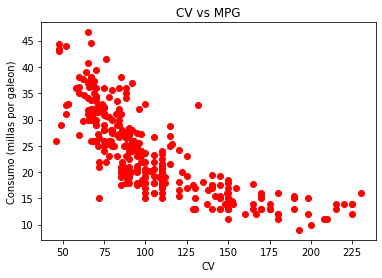

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
df_train = train.copy()
df_train["mpg"] = df_train["mpg"].dropna()
df_train["horsepower"] = df_train["horsepower"].dropna()

plt.plot(df_train["horsepower"], df_train["mpg"], "ro")
plt.xlabel("CV")
plt.ylabel("Consumo (millas por galeon)")
plt.title("CV vs MPG")

## Modelo de regresión lineal

In [5]:
Y_train = train["mpg"]
X_train = pd.DataFrame(train["horsepower"])

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

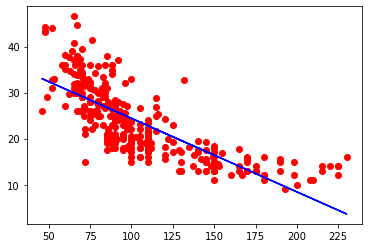

In [6]:
%matplotlib inline
plt.plot(X_train,Y_train, "ro")
plt.plot(X_train, lm.predict(X_train), color="blue")

In [7]:
lm.score(X_train, Y_train)

0.6089440120013582

In [8]:
print("mpg =  a + b * horsepower")
print("mpg =  " + str(lm.intercept_) + " + " + str(lm.coef_[0]) + " * horsepower")

mpg =  a + b * horsepower
mpg =  40.36300519186059 + -0.1596442097529483 * horsepower


## Modelo de regresión polinómico

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [15]:
print("mpg =  a + b * horsepower + c * horsepower^2")

mpg =  a + b * horsepower + c * horsepower^2


In [10]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) #hacemos la transformación lineal a partir de los datos originales

In [11]:
#Ahora hacemos la regresión lineal igual que antes
lm = linear_model.LinearRegression()
lm.fit(X_train_poly, Y_train)

LinearRegression()

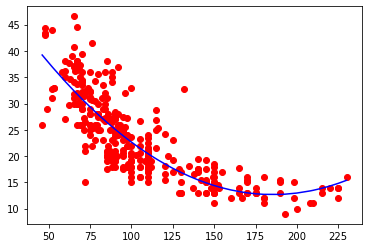

In [12]:
df2 = X_train.copy()
df2["predictions"] = lm.predict(X_train_poly)
df2_ordered = df2.sort_values("horsepower")

%matplotlib inline
plt.plot(X_train,Y_train, "ro")
plt.plot(df2_ordered["horsepower"], df2_ordered["predictions"], color="blue")

In [13]:
lm.score(X_train_poly, Y_train)

0.7089793353247302